In [1]:
# Implementation of ORB Algorithm

In [2]:
# import the libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

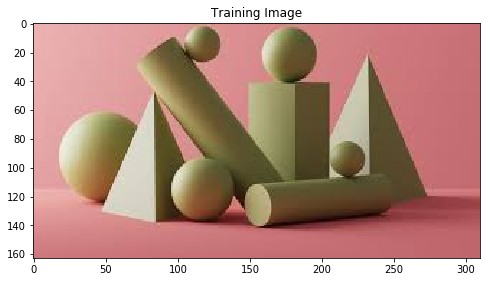

In [10]:
# Load the training image
image1 = cv2.imread("C:/Users/HY/Downloads/orb-image.jpg")

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Displaying the training image
fx, plots = plt.subplots(1, 1, figsize=(8,8))

plots.set_title("Training Image")
plots.imshow(training_image)

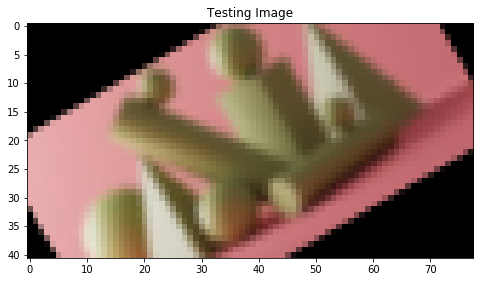

In [11]:
# Creation of test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Displaying the testing image
fx, plots = plt.subplots(1, 1, figsize=(8,8))

plots.set_title("Testing Image")
plots.imshow(test_image)

Number of Keypoints Detected In The Training Image:  177
Number of Keypoints Detected In The Query Image:  0


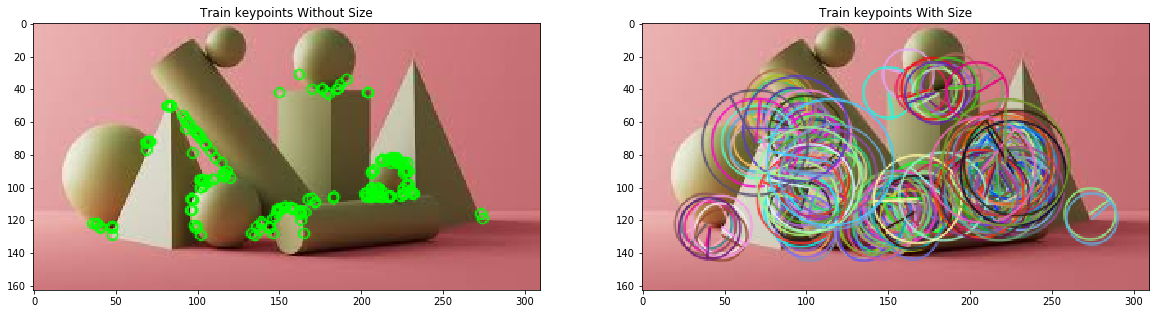

In [5]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display images with keypoint size (left) and without keypoints size (right)
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints Without Size")
plots[0].imshow(keypoints_without_size, cmap='gray')

plots[1].set_title("Train keypoints With Size")
plots[1].imshow(keypoints_with_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the test image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))